In [35]:
import numpy as np
import random
from tqdm import trange
import matplotlib.pyplot as plt

from mino import AdaptiveMinorityGame, BasicMinorityGame

In [37]:
N, M, K = 1000+1, 5, 10
# N: number of players
# M: length of memory
# K: strategy space for each player

T_SIMU = 10000

In [39]:
# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='bestpair', rescoring_method='local')

# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=60, worst_proportion=0.4, crossover_method='random', rescoring_method='global')

# 上面是2个crossover_method 和 rescoring_method 的示例

# g = AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=K, evolve_interval=12, worst_proportion=0.1)
# g = BasicMinorityGame(num_agent=N, brain_size=M, strat_choices=K)

games = []
k_list = [2,4,6,8,10,14,20,30]
for k in k_list:
    # games.append(BasicMinorityGame(num_agent=N, brain_size=M, strat_choices=k))
    games.append(AdaptiveMinorityGame(num_agent=N, brain_size=M, strat_choices=k, evolve_interval=60, worst_proportion=0.4, crossover_method='bestpair', rescoring_method='global'))

In [43]:
# attnrec, gamerec = g.simulate(T_SIMU)
attnrecs = []
gamerecs = []
for game in games:
    attnrec, gamerec = game.simulate(T_SIMU)
    attnrecs.append(attnrec)
    gamerecs.append(gamerec)


100%|██████████| 10000/10000 [05:54<00:00, 28.21it/s]


average attendance:
	500.4578


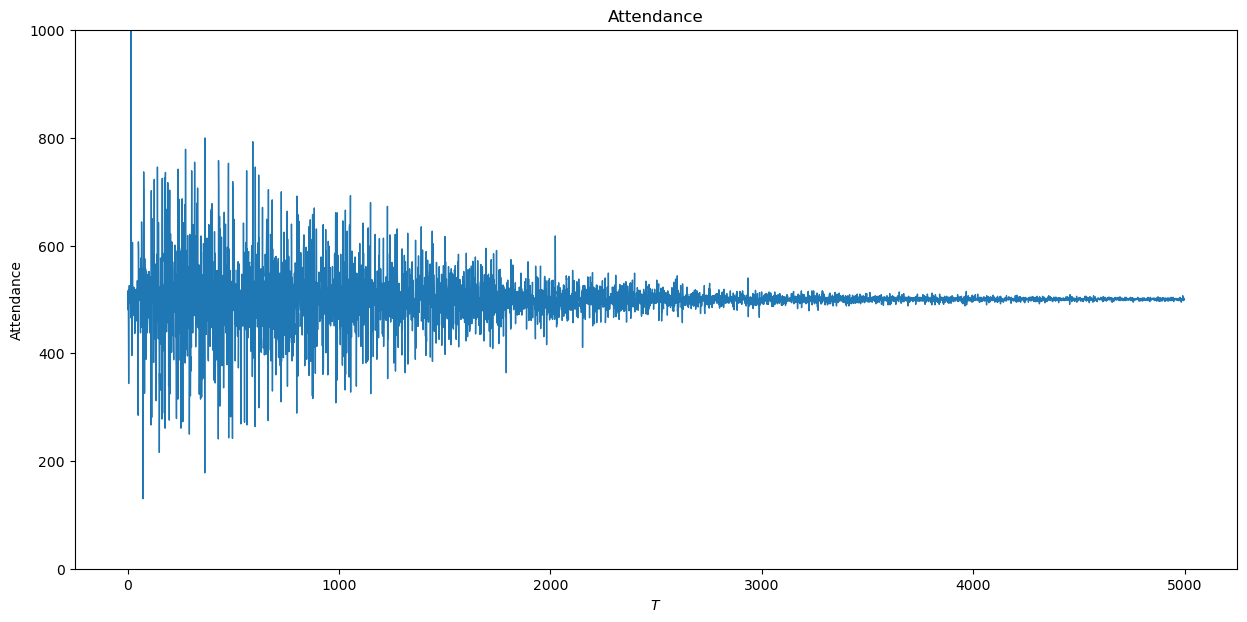

In [26]:
print(f"average attendance:\n\t{np.mean(attnrec)}")

plt.figure(figsize=(15, 7))
plt.plot(attnrec, lw=1.0)
plt.ylim((0,N))
plt.title('Attendance')
plt.xlabel('$T$')
plt.ylabel('Attendance')
plt.show()

In [28]:
gamerec = np.array(gamerec)
win_count = np.cumsum(gamerec, axis=0)*1.0

In [30]:
win_rate = win_count/np.cumsum(np.ones_like(win_count), axis=0)
# win_rate = win_count

final_round = win_rate[-1, :]
min_wr_idx = np.argwhere(final_round==np.min(final_round))[0]
max_wr_idx = np.argwhere(final_round==np.max(final_round))[0]
print(f"max wr\n\t{np.max(final_round)}")
print(f"min wr\n\t{np.min(final_round)}")

max wr
	0.5018
min wr
	0.4516


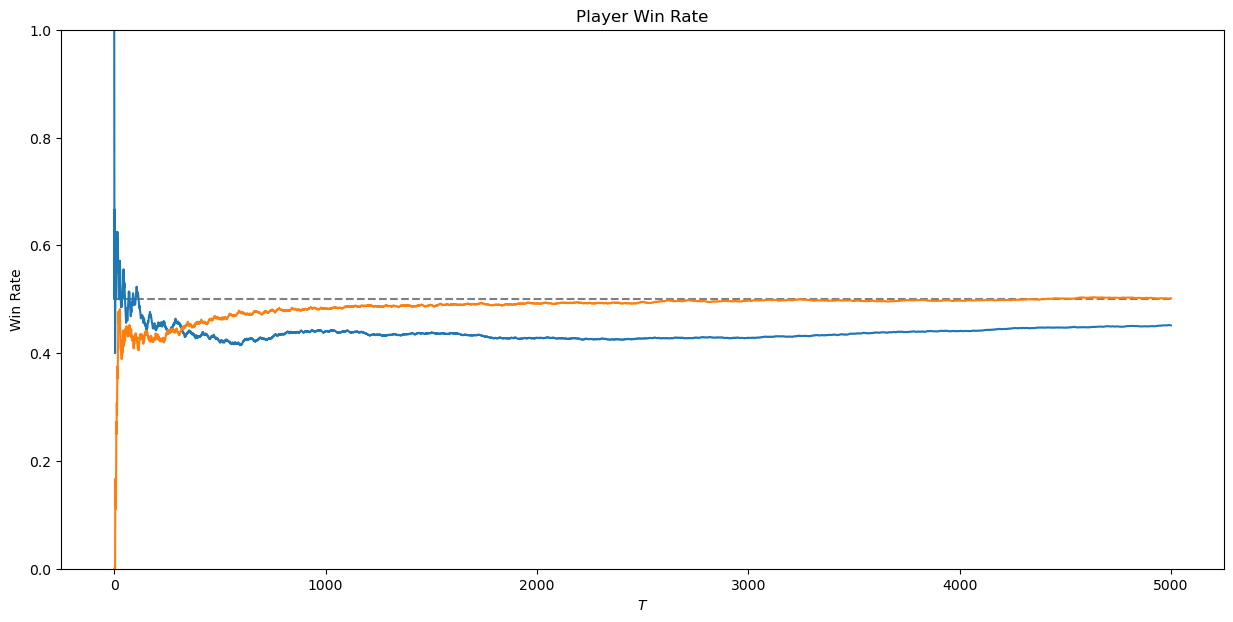

In [32]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0.5, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
plt.plot(win_rate[:, min_wr_idx])
plt.plot(win_rate[:, max_wr_idx])
plt.ylim((0,1))
plt.title('Player Win Rate')
plt.xlabel('$T$')
plt.ylabel('Win Rate')
plt.show()

In [34]:
mean_win_count = np.mean(win_count, axis=1).reshape(T_SIMU,1)

decentralized_performance = win_count-mean_win_count


final_round = decentralized_performance[-1, :]
min_perf_idx = np.argwhere(final_round==np.min(final_round))[0]
max_perf_idx = np.argwhere(final_round==np.max(final_round))[0]
print(f"max decentralized_performance\n\t{np.max(final_round)}")
print(f"min decentralized_performance\n\t{np.min(final_round)}")

max decentralized_performance
	125.04295704295691
min decentralized_performance
	-125.95704295704309


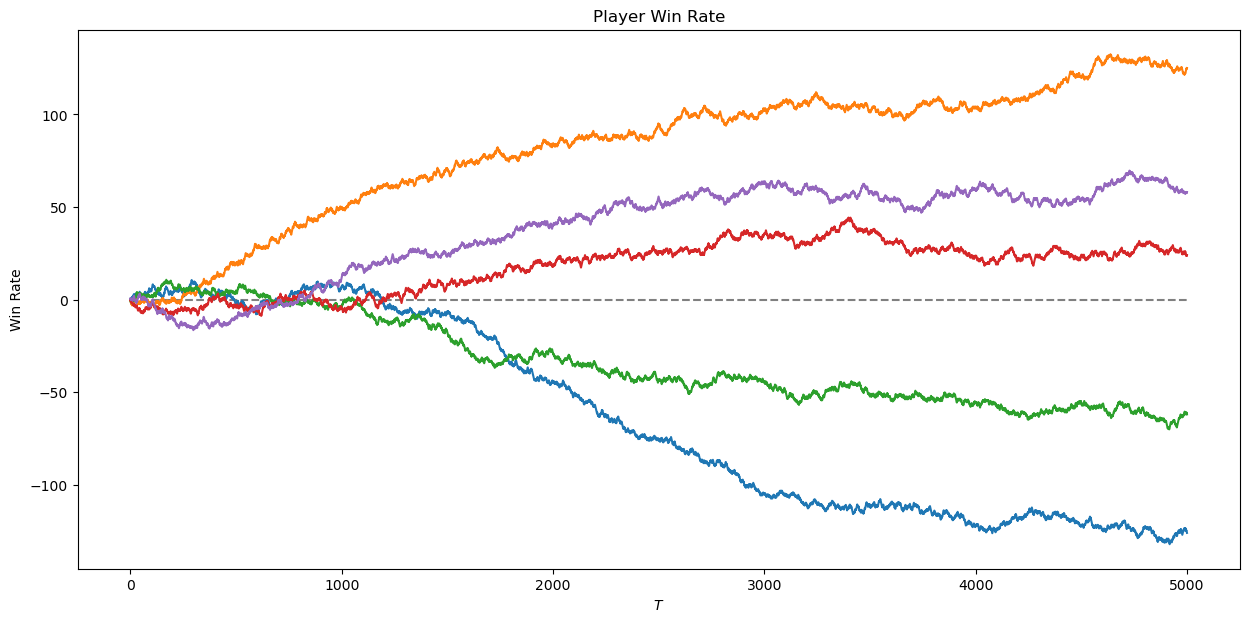

In [36]:
plt.figure(figsize=(15, 7))
plt.hlines(y=0, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
plt.plot(decentralized_performance[:, min_perf_idx])
plt.plot(decentralized_performance[:, max_perf_idx])

rand_idx = np.random.choice(np.arange(N), size=3, replace=False)
plt.plot(decentralized_performance[:, rand_idx[0]])
plt.plot(decentralized_performance[:, rand_idx[1]])
plt.plot(decentralized_performance[:, rand_idx[2]])
plt.title('Player Win Rate')
plt.xlabel('$T$')
plt.ylabel('Win Rate')
plt.show()

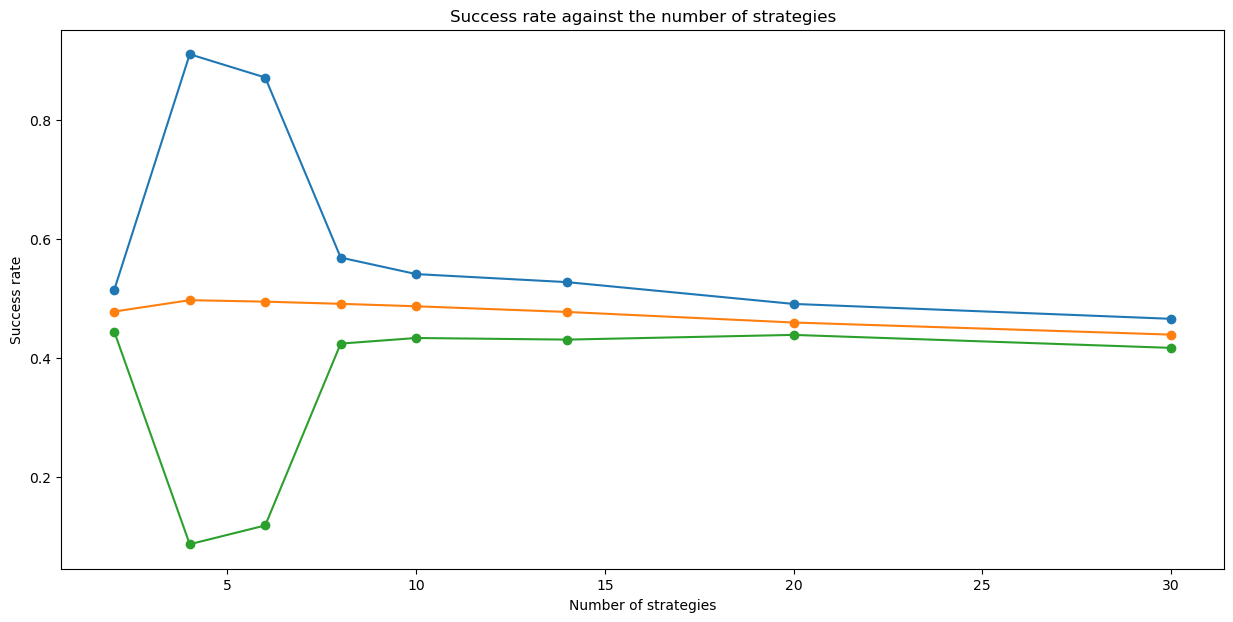

In [45]:
plt.figure(figsize=(15, 7))
# plt.hlines(y=0, xmin=0, xmax=T_SIMU, linestyles='dashed', colors='gray')
best_x, mean_x, wors_x, best_y, mean_y, wors_y = [],[],[],[],[],[]
for i in range(len(k_list)):
    gamerec = np.array(gamerecs[i])
    # print(f"i = {i}\ngamerec {gamerec.shape}")
    win_count = np.cumsum(gamerec, axis=0)*1.0
    win_rate = win_count/np.cumsum(np.ones_like(win_count), axis=0)
    # win_rate = win_count
    
    final_round = win_rate[-1, :]
    # print(final_round)
    best_x.append(k_list[i])
    mean_x.append(k_list[i])
    wors_x.append(k_list[i])
    best_y.append(np.max(final_round))
    mean_y.append(np.mean(final_round))
    wors_y.append(np.min(final_round))
    

plt.plot(best_x, best_y, marker = 'o')
plt.plot(mean_x, mean_y, marker = 'o')
plt.plot(wors_x, wors_y, marker = 'o')


plt.title('Success rate against the number of strategies')
plt.xlabel('Number of strategies')
plt.ylabel('Success rate')
plt.show()